In [1]:
from jupyter_dash import JupyterDash
import os

# dash libs
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

In [2]:
%matplotlib inline
from selenium import webdriver
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import *
from bs4 import BeautifulSoup

In [3]:
import seaborn as sn
from scipy                 import stats
from scipy.stats           import linregress

In [4]:
import requests

In [5]:
def get_nba_url(url):
    driver = webdriver.Chrome(executable_path=r'C:\Users\chris\OneDrive\nba_hustle_stats\chromedriver.exe')
    driver.get(url)
    htmlSource = driver.page_source
    
    soup = BeautifulSoup(htmlSource, 'html.parser')
    table = soup.find('div', class_='nba-stat-table__overflow')
    df_list = pd.read_html(table.prettify())
    df = df_list[0]
    return df

In [6]:
def nba20(team):
    return '2020 ' + team
def nba19(team):
    return '2019 ' + team
def nba18(team):
    return '2018 ' + team
def nba17(team):
    return '2017 ' + team

In [22]:
hustle19_df = get_nba_url('https://stats.nba.com/teams/hustle/?Season=2018-19&SeasonType=Playoffs')
hustle19_df

,TEAM,MIN,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots
0,Boston Celtics,96.0,7.2,16.6,11.4,2.3,4.9,7.2,32.3,67.7,0.89,31.3,25.8,57.1
1,Brooklyn Nets,96.0,13.4,31.2,12.2,3.8,4.4,8.2,46.3,53.7,0.20,46.2,18.2,64.4
2,Denver Nuggets,98.9,9.6,21.6,12.4,3.5,3.5,7.0,50.0,50.0,0.43,42.4,18.0,60.4
3,Detroit Pistons,96.0,11.0,25.0,13.3,2.5,3.8,6.3,40.0,60.0,1.50,31.3,23.8,55.0
4,Golden State Warriors,96.9,8.1,20.6,13.6,3.4,4.2,7.6,44.3,55.7,0.91,35.8,27.9,63.7
5,Houston Rockets,96.9,5.5,12.8,11.9,3.8,3.9,7.7,49.4,50.6,0.73,30.7,22.3,53.0
6,Indiana Pacers,96.0,6.5,15.5,10.8,4.0,3.0,7.0,57.1,42.9,0.25,27.0,19.0,46.0
7,LA Clippers,96.0,6.8,15.3,12.2,3.8,3.5,7.3,52.3,47.7,0.83,36.7,22.2,58.8
8,Milwaukee Bucks,97.3,4.5,10.3,11.2,4.0,5.2,9.2,43.5,56.5,0.73,43.7,26.5,70.1
9,Oklahoma City Thunder,96.0,8.2,17.2,11.8,5.0,4.6,9.6,52.1,47.9,1.60,49.0,23.0,72.0


In [17]:
hustle19_df.columns.to_list()

['TEAM',
 'MIN',
 'Screen  Assists',
 'Screen  Assists PTS',
 'Deflections',
 'OFF Loose Balls  Recovered',
 'DEF Loose Balls  Recovered',
 'Loose Balls  Recovered',
 '% Loose Balls  Recovered OFF',
 '% Loose Balls  Recovered DEF',
 'Charges  Drawn',
 'Contested  2PT\xa0Shots',
 'Contested  3PT\xa0Shots',
 'Contested  Shots']

In [23]:
hustle19_df['TEAM'] = hustle19_df['TEAM'].apply(nba19) 
hustle19_df.head()

,TEAM,MIN,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots
0,2019 Boston Celtics,96.0,7.2,16.6,11.4,2.3,4.9,7.2,32.3,67.7,0.89,31.3,25.8,57.1
1,2019 Brooklyn Nets,96.0,13.4,31.2,12.2,3.8,4.4,8.2,46.3,53.7,0.20,46.2,18.2,64.4
2,2019 Denver Nuggets,98.9,9.6,21.6,12.4,3.5,3.5,7.0,50.0,50.0,0.43,42.4,18.0,60.4
3,2019 Detroit Pistons,96.0,11.0,25.0,13.3,2.5,3.8,6.3,40.0,60.0,1.50,31.3,23.8,55.0
4,2019 Golden State Warriors,96.9,8.1,20.6,13.6,3.4,4.2,7.6,44.3,55.7,0.91,35.8,27.9,63.7


In [24]:
hustle18_df = get_nba_url('https://stats.nba.com/teams/hustle/?Season=2017-18&SeasonType=Playoffs')
hustle18_df

,TEAM,MIN,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots
0,Boston Celtics,97.1,7.1,16.8,13.2,5.3,6.2,11.5,46.3,53.7,0.74,35.4,22.8,58.3
1,Cleveland Cavaliers,96.9,9.6,22.2,11.7,5.4,5.0,10.4,51.5,48.0,0.64,34.5,23.1,57.6
2,Golden State Warriors,96.5,9.8,23.6,16.2,5.9,7.9,13.7,42.7,57.3,0.33,40.5,26.0,66.5
3,Houston Rockets,96.0,10.6,24.8,15.1,5.9,7.9,13.8,43.0,57.0,0.47,37.6,21.8,59.5
4,Indiana Pacers,96.0,5.6,13.6,15.1,3.3,5.7,9.0,36.5,63.5,0.86,31.1,27.1,58.3
5,Miami Heat,96.0,9.4,22.0,17.2,5.4,7.6,13.0,41.5,58.5,0.40,37.6,25.2,62.8
6,Milwaukee Bucks,97.4,7.9,16.7,15.4,4.6,6.4,11.0,41.6,58.4,0.43,43.3,25.6,68.9
7,Minnesota Timberwolves,96.0,5.4,11.4,11.8,4.6,4.0,8.6,53.5,46.5,0.20,28.8,34.0,62.8
8,New Orleans Pelicans,96.0,9.7,22.1,16.9,4.8,6.4,11.2,42.6,57.4,0.11,44.4,25.2,69.7
9,Oklahoma City Thunder,96.0,8.7,20.5,18.5,7.0,8.2,15.2,46.2,53.8,0.33,40.8,27.2,68.0


In [27]:
hustle18_df['TEAM'] = hustle18_df['TEAM'].apply(nba18)
hustle18_df.head()

,TEAM,MIN,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots
0,2018 Boston Celtics,97.1,7.1,16.8,13.2,5.3,6.2,11.5,46.3,53.7,0.74,35.4,22.8,58.3
1,2018 Cleveland Cavaliers,96.9,9.6,22.2,11.7,5.4,5.0,10.4,51.5,48.0,0.64,34.5,23.1,57.6
2,2018 Golden State Warriors,96.5,9.8,23.6,16.2,5.9,7.9,13.7,42.7,57.3,0.33,40.5,26.0,66.5
3,2018 Houston Rockets,96.0,10.6,24.8,15.1,5.9,7.9,13.8,43.0,57.0,0.47,37.6,21.8,59.5
4,2018 Indiana Pacers,96.0,5.6,13.6,15.1,3.3,5.7,9.0,36.5,63.5,0.86,31.1,27.1,58.3


In [28]:
hustle17_df = get_nba_url('https://stats.nba.com/teams/hustle/?Season=2016-17&SeasonType=Playoffs')
hustle17_df.head()

,TEAM,MIN,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots
0,Atlanta Hawks,96.0,14.0,32.7,13.8,0.0,0.0,11.5,0.0,0.0,2.00,44.5,23.2,67.7
1,Boston Celtics,96.6,9.9,23.1,15.1,0.0,0.0,11.8,0.0,0.0,0.33,38.0,21.3,59.3
2,Chicago Bulls,96.0,10.0,21.5,15.8,0.0,0.0,8.2,0.0,0.0,0.50,36.2,30.5,66.7
3,Cleveland Cavaliers,96.0,10.1,24.1,14.9,0.0,0.0,12.9,0.0,0.0,0.44,36.8,20.8,57.6
4,Golden State Warriors,96.0,8.9,21.4,18.0,0.0,0.0,14.1,0.0,0.0,0.24,38.6,21.1,59.8


In [29]:
hustle17_df['TEAM'] = hustle17_df['TEAM'].apply(nba17)
hustle17_df.head()

,TEAM,MIN,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots
0,2017 Atlanta Hawks,96.0,14.0,32.7,13.8,0.0,0.0,11.5,0.0,0.0,2.00,44.5,23.2,67.7
1,2017 Boston Celtics,96.6,9.9,23.1,15.1,0.0,0.0,11.8,0.0,0.0,0.33,38.0,21.3,59.3
2,2017 Chicago Bulls,96.0,10.0,21.5,15.8,0.0,0.0,8.2,0.0,0.0,0.50,36.2,30.5,66.7
3,2017 Cleveland Cavaliers,96.0,10.1,24.1,14.9,0.0,0.0,12.9,0.0,0.0,0.44,36.8,20.8,57.6
4,2017 Golden State Warriors,96.0,8.9,21.4,18.0,0.0,0.0,14.1,0.0,0.0,0.24,38.6,21.1,59.8


In [30]:
playoff_hustle = pd.concat([hustle19_df, hustle18_df, hustle17_df])
playoff_hustle

,TEAM,MIN,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots
0,2019 Boston Celtics,96.0,7.2,16.6,11.4,2.3,4.9,7.2,32.3,67.7,0.89,31.3,25.8,57.1
1,2019 Brooklyn Nets,96.0,13.4,31.2,12.2,3.8,4.4,8.2,46.3,53.7,0.20,46.2,18.2,64.4
2,2019 Denver Nuggets,98.9,9.6,21.6,12.4,3.5,3.5,7.0,50.0,50.0,0.43,42.4,18.0,60.4
3,2019 Detroit Pistons,96.0,11.0,25.0,13.3,2.5,3.8,6.3,40.0,60.0,1.50,31.3,23.8,55.0
4,2019 Golden State Warriors,96.9,8.1,20.6,13.6,3.4,4.2,7.6,44.3,55.7,0.91,35.8,27.9,63.7
5,2019 Houston Rockets,96.9,5.5,12.8,11.9,3.8,3.9,7.7,49.4,50.6,0.73,30.7,22.3,53.0
6,2019 Indiana Pacers,96.0,6.5,15.5,10.8,4.0,3.0,7.0,57.1,42.9,0.25,27.0,19.0,46.0
7,2019 LA Clippers,96.0,6.8,15.3,12.2,3.8,3.5,7.3,52.3,47.7,0.83,36.7,22.2,58.8
8,2019 Milwaukee Bucks,97.3,4.5,10.3,11.2,4.0,5.2,9.2,43.5,56.5,0.73,43.7,26.5,70.1
9,2019 Oklahoma City Thunder,96.0,8.2,17.2,11.8,5.0,4.6,9.6,52.1,47.9,1.60,49.0,23.0,72.0


In [43]:
playoff_hustle.rename(columns={'Contested  2PT\xa0Shots': 'Contested 2PT Shots',
                                   'Contested  3PT\xa0Shots': 'Contested 3PT Shots'},
                         inplace=True)

playoff_hustle.columns.to_list()

['TEAM',
 'MIN',
 'Screen  Assists',
 'Screen  Assists PTS',
 'Deflections',
 'OFF Loose Balls  Recovered',
 'DEF Loose Balls  Recovered',
 'Loose Balls  Recovered',
 '% Loose Balls  Recovered OFF',
 '% Loose Balls  Recovered DEF',
 'Charges  Drawn',
 'Contested 2PT Shots',
 'Contested 3PT Shots',
 'Contested  Shots']

In [31]:
advanced19 = get_nba_url('https://stats.nba.com/teams/advanced/?sort=W&dir=-1&Season=2018-19&SeasonType=Playoffs')
advanced19.head()

,Unnamed: 0,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,...,AST/TO RANK,AST Ratio RANK,OREB% RANK,DREB% RANK,REB% RANK,TO Ratio RANK,eFG% RANK,TS% RANK,PACE RANK,PIE RANK
0,1,Toronto Raptors,24,16,8,1162.0,109.8,104.2,5.6,59.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Golden State Warriors,22,14,8,1066.0,114.6,111.5,3.1,69.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Milwaukee Bucks,15,10,5,730.0,110.7,101.9,8.8,62.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Portland Trail Blazers,16,8,8,793.0,109.5,110.6,-1.1,50.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Denver Nuggets,14,7,7,692.0,113.3,111.1,2.2,60.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
advanced19['TEAM'] = advanced19['TEAM'].apply(nba19)
advanced19.head()

,Unnamed: 0,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,...,AST/TO RANK,AST Ratio RANK,OREB% RANK,DREB% RANK,REB% RANK,TO Ratio RANK,eFG% RANK,TS% RANK,PACE RANK,PIE RANK
0,1,2019 Toronto Raptors,24,16,8,1162.0,109.8,104.2,5.6,59.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019 Golden State Warriors,22,14,8,1066.0,114.6,111.5,3.1,69.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019 Milwaukee Bucks,15,10,5,730.0,110.7,101.9,8.8,62.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019 Portland Trail Blazers,16,8,8,793.0,109.5,110.6,-1.1,50.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019 Denver Nuggets,14,7,7,692.0,113.3,111.1,2.2,60.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
advanced19.columns.to_list()

['Unnamed: 0',
 'TEAM',
 'GP',
 'W',
 'L',
 'MIN',
 'OffRtg',
 'DefRtg',
 'NetRtg',
 'AST%',
 'AST/TO',
 'AST  Ratio',
 'OREB%',
 'DREB%',
 'REB%',
 'TOV%',
 'eFG%',
 'TS%',
 'PACE',
 'PIE',
 'GP RANK',
 'W RANK',
 'L RANK',
 'MIN RANK',
 'OffRtg RANK',
 'DefRtg RANK',
 'NetRtg RANK',
 'AST% RANK',
 'AST/TO RANK',
 'AST  Ratio RANK',
 'OREB% RANK',
 'DREB% RANK',
 'REB% RANK',
 'TO  Ratio RANK',
 'eFG% RANK',
 'TS% RANK',
 'PACE RANK',
 'PIE RANK']

In [34]:
advanced18 = get_nba_url('https://stats.nba.com/teams/advanced/?sort=W&dir=-1&Season=2017-18&SeasonType=Playoffs')
advanced18.head(3)

,Unnamed: 0,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,...,AST/TO RANK,AST Ratio RANK,OREB% RANK,DREB% RANK,REB% RANK,TO Ratio RANK,eFG% RANK,TS% RANK,PACE RANK,PIE RANK
0,1,Golden State Warriors,21,16,5,1013.0,112.7,102.0,10.7,63.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Cleveland Cavaliers,22,12,10,1066.0,108.3,111.1,-2.8,52.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Boston Celtics,19,11,8,922.0,107.1,106.2,0.9,58.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
advanced18['TEAM'] = advanced18['TEAM'].apply(nba18)
advanced18.head(3)

,Unnamed: 0,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,...,AST/TO RANK,AST Ratio RANK,OREB% RANK,DREB% RANK,REB% RANK,TO Ratio RANK,eFG% RANK,TS% RANK,PACE RANK,PIE RANK
0,1,2018 Golden State Warriors,21,16,5,1013.0,112.7,102.0,10.7,63.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2018 Cleveland Cavaliers,22,12,10,1066.0,108.3,111.1,-2.8,52.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2018 Boston Celtics,19,11,8,922.0,107.1,106.2,0.9,58.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
advanced17 = get_nba_url('https://stats.nba.com/teams/advanced/?sort=W&dir=-1&Season=2016-17&SeasonType=Playoffs')
advanced17.head(3)

,Unnamed: 0,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,...,AST/TO RANK,AST Ratio RANK,OREB% RANK,DREB% RANK,REB% RANK,TO Ratio RANK,eFG% RANK,TS% RANK,PACE RANK,PIE RANK
0,1,Golden State Warriors,17,16,1,816.0,118.2,105.3,12.9,65.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Cleveland Cavaliers,18,13,5,864.0,119.9,111.8,8.1,53.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Boston Celtics,18,9,9,869.0,110.4,113.5,-3.1,70.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
advanced17['TEAM'] = advanced17['TEAM'].apply(nba17)
advanced17.head()

,Unnamed: 0,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,...,AST/TO RANK,AST Ratio RANK,OREB% RANK,DREB% RANK,REB% RANK,TO Ratio RANK,eFG% RANK,TS% RANK,PACE RANK,PIE RANK
0,1,2017 Golden State Warriors,17,16,1,816.0,118.2,105.3,12.9,65.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2017 Cleveland Cavaliers,18,13,5,864.0,119.9,111.8,8.1,53.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2017 Boston Celtics,18,9,9,869.0,110.4,113.5,-3.1,70.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2017 San Antonio Spurs,16,8,8,778.0,112.8,111.6,1.2,53.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2017 Washington Wizards,13,7,6,629.0,110.2,110.5,-0.3,56.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
playoffs_adv = pd.concat([advanced19, advanced18, advanced17])
playoffs_adv

,Unnamed: 0,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,...,AST/TO RANK,AST Ratio RANK,OREB% RANK,DREB% RANK,REB% RANK,TO Ratio RANK,eFG% RANK,TS% RANK,PACE RANK,PIE RANK
0,1,2019 Toronto Raptors,24,16,8,1162.0,109.8,104.2,5.6,59.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019 Golden State Warriors,22,14,8,1066.0,114.6,111.5,3.1,69.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019 Milwaukee Bucks,15,10,5,730.0,110.7,101.9,8.8,62.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019 Portland Trail Blazers,16,8,8,793.0,109.5,110.6,-1.1,50.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019 Denver Nuggets,14,7,7,692.0,113.3,111.1,2.2,60.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2019 Philadelphia 76ers,12,7,5,576.0,109.1,106.0,3.1,61.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2019 Houston Rockets,11,6,5,533.0,110.5,107.4,3.0,49.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2019 Boston Celtics,9,5,4,432.0,101.4,103.0,-1.5,60.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2019 San Antonio Spurs,7,3,4,336.0,110.7,113.1,-2.3,53.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2019 LA Clippers,6,2,4,288.0,111.5,120.5,-9.0,63.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
playoffs_adv.drop(columns=['GP RANK', 'W RANK', 'L RANK',
       'MIN RANK', 'OffRtg RANK', 'DefRtg RANK', 'NetRtg RANK', 'AST% RANK',
       'AST/TO RANK', 'AST  Ratio RANK', 'OREB% RANK', 'DREB% RANK',
       'REB% RANK', 'TO  Ratio RANK', 'eFG% RANK', 'TS% RANK', 'PACE RANK',
       'PIE RANK'], inplace=True)

playoffs_adv.drop(columns=["Unnamed: 0"], inplace=True)
playoffs_adv

,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE
0,2019 Toronto Raptors,24,16,8,1162.0,109.8,104.2,5.6,59.8,1.87,17.2,23.9,71.9,48.3,12.4,51.5,56.1,96.25,52.4
1,2019 Golden State Warriors,22,14,8,1066.0,114.6,111.5,3.1,69.1,1.91,20.0,30.1,71.4,51.3,15.0,54.8,58.9,98.57,53.6
2,2019 Milwaukee Bucks,15,10,5,730.0,110.7,101.9,8.8,62.8,1.92,17.8,25.9,77.6,52.6,12.8,52.3,56.0,100.57,55.5
3,2019 Portland Trail Blazers,16,8,8,793.0,109.5,110.6,-1.1,50.1,1.53,14.6,29.8,69.1,49.1,12.9,50.1,54.1,97.15,47.1
4,2019 Denver Nuggets,14,7,7,692.0,113.3,111.1,2.2,60.1,2.45,17.6,31.1,70.3,50.5,10.2,49.6,53.9,93.68,51.8
5,2019 Philadelphia 76ers,12,7,5,576.0,109.1,106.0,3.1,61.9,1.48,17.5,31.9,75.2,54.1,16.6,51.4,55.9,99.63,53.8
6,2019 Houston Rockets,11,6,5,533.0,110.5,107.4,3.0,49.1,1.16,14.1,28.7,68.7,49.1,16.1,53.7,57.4,97.26,49.7
7,2019 Boston Celtics,9,5,4,432.0,101.4,103.0,-1.5,60.1,1.45,16.1,22.9,78.3,51.4,14.7,49.1,53.9,100.61,50.2
8,2019 San Antonio Spurs,7,3,4,336.0,110.7,113.1,-2.3,53.6,2.51,16.6,26.4,72.6,49.9,9.0,50.3,54.2,93.14,49.3
9,2019 LA Clippers,6,2,4,288.0,111.5,120.5,-9.0,63.6,1.69,17.7,29.3,71.4,49.0,14.6,51.1,56.3,103.08,43.1


In [44]:
trad19 = get_nba_url('https://stats.nba.com/teams/traditional/?sort=W_PCT&dir=-1&Season=2018-19&SeasonType=Playoffs')

trad19.head(3)

,Unnamed: 0,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB RANK,REB RANK,AST RANK,TOV RANK,STL RANK,BLK RANK,BLKA RANK,PF RANK,PFD RANK,+/- RANK
0,1,Milwaukee Bucks,15,10,5,0.667,48.7,112.8,39.8,88.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Toronto Raptors,24,16,8,0.667,48.4,106.6,37.7,84.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Golden State Warriors,22,14,8,0.636,48.5,114.1,41.1,86.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
trad19['TEAM'] = trad19['TEAM'].apply(nba19)

trad19.head(3)

,Unnamed: 0,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB RANK,REB RANK,AST RANK,TOV RANK,STL RANK,BLK RANK,BLKA RANK,PF RANK,PFD RANK,+/- RANK
0,1,2019 Milwaukee Bucks,15,10,5,0.667,48.7,112.8,39.8,88.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019 Toronto Raptors,24,16,8,0.667,48.4,106.6,37.7,84.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019 Golden State Warriors,22,14,8,0.636,48.5,114.1,41.1,86.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
trad18 = get_nba_url('https://stats.nba.com/teams/traditional/?sort=W_PCT&dir=-1&Season=2017-18&SeasonType=Playoffs')

trad18

,Unnamed: 0,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB RANK,REB RANK,AST RANK,TOV RANK,STL RANK,BLK RANK,BLKA RANK,PF RANK,PFD RANK,+/- RANK
0,1,Golden State Warriors,21,16,5,0.762,48.2,110.4,41.2,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Houston Rockets,17,11,6,0.647,48.0,104.9,37.2,85.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Boston Celtics,19,11,8,0.579,48.5,101.4,36.4,83.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,New Orleans Pelicans,9,5,4,0.556,48.0,110.0,42.9,89.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Cleveland Cavaliers,22,12,10,0.545,48.5,101.1,36.9,81.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Philadelphia 76ers,10,5,5,0.500,48.5,108.8,38.7,88.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Utah Jazz,11,5,6,0.455,48.0,102.4,37.7,82.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Indiana Pacers,7,3,4,0.429,48.0,100.6,38.6,80.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,Milwaukee Bucks,7,3,4,0.429,48.7,101.9,39.1,78.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Toronto Raptors,10,4,6,0.400,48.5,107.3,38.9,82.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
trad18['TEAM'] = trad18['TEAM'].apply(nba18)
trad18.head(3)

,Unnamed: 0,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB RANK,REB RANK,AST RANK,TOV RANK,STL RANK,BLK RANK,BLKA RANK,PF RANK,PFD RANK,+/- RANK
0,1,2018 Golden State Warriors,21,16,5,0.762,48.2,110.4,41.2,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2018 Houston Rockets,17,11,6,0.647,48.0,104.9,37.2,85.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2018 Boston Celtics,19,11,8,0.579,48.5,101.4,36.4,83.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
trad17 = get_nba_url('https://stats.nba.com/teams/traditional/?sort=W_PCT&dir=-1&Season=2016-17&SeasonType=Playoffs')

trad17.head(3)

,Unnamed: 0,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB RANK,REB RANK,AST RANK,TOV RANK,STL RANK,BLK RANK,BLKA RANK,PF RANK,PFD RANK,+/- RANK
0,1,Golden State Warriors,17,16,1,0.941,48.0,119.3,42.9,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Cleveland Cavaliers,18,13,5,0.722,48.0,116.2,40.9,83.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Houston Rockets,11,6,5,0.545,48.5,107.7,37.3,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
trad17['TEAM'] = trad17['TEAM'].apply(nba17)

trad17

,Unnamed: 0,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB RANK,REB RANK,AST RANK,TOV RANK,STL RANK,BLK RANK,BLKA RANK,PF RANK,PFD RANK,+/- RANK
0,1,2017 Golden State Warriors,17,16,1,0.941,48.0,119.3,42.9,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2017 Cleveland Cavaliers,18,13,5,0.722,48.0,116.2,40.9,83.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2017 Houston Rockets,11,6,5,0.545,48.5,107.7,37.3,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2017 Washington Wizards,13,7,6,0.538,48.4,108.1,40.1,87.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2017 Boston Celtics,18,9,9,0.500,48.3,105.2,38.4,84.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2017 San Antonio Spurs,16,8,8,0.500,48.6,107.1,40.0,86.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2017 LA Clippers,7,3,4,0.429,48.0,97.7,36.4,77.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2017 Toronto Raptors,10,4,6,0.400,48.0,96.7,35.3,79.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2017 Utah Jazz,11,4,7,0.364,48.0,97.8,35.6,78.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2017 Atlanta Hawks,6,2,4,0.333,48.0,105.5,37.5,84.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
playoff_trad = pd.concat([trad19, trad18, trad17])
playoff_trad

,Unnamed: 0,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB RANK,REB RANK,AST RANK,TOV RANK,STL RANK,BLK RANK,BLKA RANK,PF RANK,PFD RANK,+/- RANK
0,1,2019 Milwaukee Bucks,15,10,5,0.667,48.7,112.8,39.8,88.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019 Toronto Raptors,24,16,8,0.667,48.4,106.6,37.7,84.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019 Golden State Warriors,22,14,8,0.636,48.5,114.1,41.1,86.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019 Philadelphia 76ers,12,7,5,0.583,48.0,108.7,39.4,85.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019 Boston Celtics,9,5,4,0.556,48.0,102.1,35.7,84.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2019 Houston Rockets,11,6,5,0.545,48.5,108.5,37.2,83.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2019 Denver Nuggets,14,7,7,0.500,49.4,109.1,39.9,90.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,2019 Portland Trail Blazers,16,8,8,0.500,49.6,109.7,39.4,90.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2019 San Antonio Spurs,7,3,4,0.429,48.0,103.3,39.4,85.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2019 LA Clippers,6,2,4,0.333,48.0,114.7,39.8,89.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
playoff_trad.drop(columns=['Unnamed: 0', 'GP RANK', 'W RANK', 'L RANK', 'WIN% RANK', 'MIN RANK', 'PTS RANK',
       'FGM RANK', 'FGA RANK', 'FG% RANK', '3PM RANK', '3PA RANK', '3P% RANK',
       'FTM RANK', 'FTA RANK', 'FT% RANK', 'OREB RANK', 'DREB RANK',
       'REB RANK', 'AST RANK', 'TOV RANK', 'STL RANK', 'BLK RANK', 'BLKA RANK',
       'PF RANK', 'PFD RANK', '+/- RANK'], inplace=True)
playoff_trad.head(3)

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,2019 Milwaukee Bucks,15,10,5,0.667,48.7,112.8,39.8,88.3,45.1,...,41.8,51.9,25.0,13.0,6.7,6.4,4.7,21.8,23.3,8.8
1,2019 Toronto Raptors,24,16,8,0.667,48.4,106.6,37.7,84.8,44.4,...,34.0,42.3,22.5,12.1,8.0,4.6,5.0,22.6,21.8,5.5
2,2019 Golden State Warriors,22,14,8,0.636,48.5,114.1,41.1,86.1,47.7,...,33.2,43.3,28.4,14.9,7.4,5.7,3.9,23.2,22.3,3.4


In [52]:
hustle_adv = pd.merge(playoff_hustle, playoffs_adv, on='TEAM')
hustle_adv

,TEAM,MIN_x,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,...,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE
0,2019 Boston Celtics,96.0,7.2,16.6,11.4,2.3,4.9,7.2,32.3,67.7,...,1.45,16.1,22.9,78.3,51.4,14.7,49.1,53.9,100.61,50.2
1,2019 Brooklyn Nets,96.0,13.4,31.2,12.2,3.8,4.4,8.2,46.3,53.7,...,1.35,13.8,25.8,64.3,44.1,13.5,48.0,53.4,105.50,41.3
2,2019 Denver Nuggets,98.9,9.6,21.6,12.4,3.5,3.5,7.0,50.0,50.0,...,2.45,17.6,31.1,70.3,50.5,10.2,49.6,53.9,93.68,51.8
3,2019 Detroit Pistons,96.0,11.0,25.0,13.3,2.5,3.8,6.3,40.0,60.0,...,2.19,16.5,24.8,72.7,45.2,10.4,44.4,47.1,101.13,35.4
4,2019 Golden State Warriors,96.9,8.1,20.6,13.6,3.4,4.2,7.6,44.3,55.7,...,1.91,20.0,30.1,71.4,51.3,15.0,54.8,58.9,98.57,53.6
5,2019 Houston Rockets,96.9,5.5,12.8,11.9,3.8,3.9,7.7,49.4,50.6,...,1.16,14.1,28.7,68.7,49.1,16.1,53.7,57.4,97.26,49.7
6,2019 Indiana Pacers,96.0,6.5,15.5,10.8,4.0,3.0,7.0,57.1,42.9,...,1.73,16.4,19.6,73.7,45.1,12.5,46.1,49.6,95.63,45.4
7,2019 LA Clippers,96.0,6.8,15.3,12.2,3.8,3.5,7.3,52.3,47.7,...,1.69,17.7,29.3,71.4,49.0,14.6,51.1,56.3,103.08,43.1
8,2019 Milwaukee Bucks,97.3,4.5,10.3,11.2,4.0,5.2,9.2,43.5,56.5,...,1.92,17.8,25.9,77.6,52.6,12.8,52.3,56.0,100.57,55.5
9,2019 Oklahoma City Thunder,96.0,8.2,17.2,11.8,5.0,4.6,9.6,52.1,47.9,...,1.49,16.6,26.4,70.1,48.2,15.1,50.0,54.1,100.90,48.2


In [53]:
hustle_adv.rename(columns={'MIN_y': 'MIN'}, inplace=True)
hustle_adv.drop(columns=["MIN_x"], inplace=True)

hustle_adv.columns

Index(['TEAM', 'Screen  Assists', 'Screen  Assists PTS', 'Deflections',
       'OFF Loose Balls  Recovered', 'DEF Loose Balls  Recovered',
       'Loose Balls  Recovered', '% Loose Balls  Recovered OFF',
       '% Loose Balls  Recovered DEF', 'Charges  Drawn', 'Contested 2PT Shots',
       'Contested 3PT Shots', 'Contested  Shots', 'GP', 'W', 'L', 'MIN',
       'OffRtg', 'DefRtg', 'NetRtg', 'AST%', 'AST/TO', 'AST  Ratio', 'OREB%',
       'DREB%', 'REB%', 'TOV%', 'eFG%', 'TS%', 'PACE', 'PIE'],
      dtype='object')

In [54]:
hustle_adv_trad = pd.merge(hustle_adv, playoff_trad, on='TEAM')
hustle_adv_trad

,TEAM,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,2019 Boston Celtics,7.2,16.6,11.4,2.3,4.9,7.2,32.3,67.7,0.89,...,40.3,47.8,21.4,14.8,5.9,3.8,4.3,20.8,21.0,-1.4
1,2019 Brooklyn Nets,13.4,31.2,12.2,3.8,4.4,8.2,46.3,53.7,0.20,...,29.2,40.4,19.2,14.2,7.6,2.8,6.0,22.8,24.2,-11.0
2,2019 Denver Nuggets,9.6,21.6,12.4,3.5,3.5,7.0,50.0,50.0,0.43,...,34.6,47.7,24.0,9.8,5.7,4.6,4.7,21.3,21.9,1.9
3,2019 Detroit Pistons,11.0,25.0,13.3,2.5,3.8,6.3,40.0,60.0,1.50,...,31.5,42.3,23.0,10.5,7.3,4.0,8.8,24.3,20.0,-23.8
4,2019 Golden State Warriors,8.1,20.6,13.6,3.4,4.2,7.6,44.3,55.7,0.91,...,33.2,43.3,28.4,14.9,7.4,5.7,3.9,23.2,22.3,3.4
5,2019 Houston Rockets,5.5,12.8,11.9,3.8,3.9,7.7,49.4,50.6,0.73,...,33.3,42.9,18.3,15.8,8.5,5.1,4.6,21.6,21.5,3.2
6,2019 Indiana Pacers,6.5,15.5,10.8,4.0,3.0,7.0,57.1,42.9,0.25,...,32.3,40.3,20.8,12.0,8.3,3.5,3.0,20.0,19.5,-7.5
7,2019 LA Clippers,6.8,15.3,12.2,3.8,3.5,7.3,52.3,47.7,0.83,...,30.2,40.2,25.3,15.0,8.0,3.3,7.5,25.0,25.8,-9.8
8,2019 Milwaukee Bucks,4.5,10.3,11.2,4.0,5.2,9.2,43.5,56.5,0.73,...,41.8,51.9,25.0,13.0,6.7,6.4,4.7,21.8,23.3,8.8
9,2019 Oklahoma City Thunder,8.2,17.2,11.8,5.0,4.6,9.6,52.1,47.9,1.60,...,33.0,43.2,22.6,15.2,6.6,5.4,5.8,24.2,23.4,-5.8


In [55]:
hustle_adv_trad.columns

Index(['TEAM', 'Screen  Assists', 'Screen  Assists PTS', 'Deflections',
       'OFF Loose Balls  Recovered', 'DEF Loose Balls  Recovered',
       'Loose Balls  Recovered', '% Loose Balls  Recovered OFF',
       '% Loose Balls  Recovered DEF', 'Charges  Drawn', 'Contested 2PT Shots',
       'Contested 3PT Shots', 'Contested  Shots', 'GP_x', 'W_x', 'L_x',
       'MIN_x', 'OffRtg', 'DefRtg', 'NetRtg', 'AST%', 'AST/TO', 'AST  Ratio',
       'OREB%', 'DREB%', 'REB%', 'TOV%', 'eFG%', 'TS%', 'PACE', 'PIE', 'GP_y',
       'W_y', 'L_y', 'WIN%', 'MIN_y', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL',
       'BLK', 'BLKA', 'PF', 'PFD', '+/-'],
      dtype='object')

In [56]:
hustle_adv_trad.drop(columns=['GP_y', 'W_y', 'L_y', 'MIN_y'], inplace=True)
hustle_adv_trad.rename(columns={'GP_x': 'GP', 'W_x': 'W', 'L_x': 'L', 'MIN_x': 'MIN'}, inplace=True)
hustle_adv_trad.columns

Index(['TEAM', 'Screen  Assists', 'Screen  Assists PTS', 'Deflections',
       'OFF Loose Balls  Recovered', 'DEF Loose Balls  Recovered',
       'Loose Balls  Recovered', '% Loose Balls  Recovered OFF',
       '% Loose Balls  Recovered DEF', 'Charges  Drawn', 'Contested 2PT Shots',
       'Contested 3PT Shots', 'Contested  Shots', 'GP', 'W', 'L', 'MIN',
       'OffRtg', 'DefRtg', 'NetRtg', 'AST%', 'AST/TO', 'AST  Ratio', 'OREB%',
       'DREB%', 'REB%', 'TOV%', 'eFG%', 'TS%', 'PACE', 'PIE', 'WIN%', 'PTS',
       'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-'],
      dtype='object')

In [57]:
hustle_adv_trad['deflection_rate'] = hustle_adv_trad['Deflections']/hustle_adv_trad['PACE']
hustle_adv_trad['loose_ball_recover_rate'] = hustle_adv_trad['Loose Balls  Recovered']/hustle_adv_trad['PACE']
hustle_adv_trad['charges_drawn_rate'] = hustle_adv_trad['Charges  Drawn']/hustle_adv_trad['PACE']
hustle_adv_trad['contest_rate'] = hustle_adv_trad['Contested  Shots']/hustle_adv_trad['PACE']
hustle_adv_trad['contested_2pt_rate'] = hustle_adv_trad['Contested 2PT Shots']/hustle_adv_trad['PACE']
hustle_adv_trad['contested_3pt_rate'] = hustle_adv_trad['Contested 3PT Shots']/hustle_adv_trad['PACE']

In [58]:
hustle_adv_trad

,TEAM,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,...,BLKA,PF,PFD,+/-,deflection_rate,loose_ball_recover_rate,charges_drawn_rate,contest_rate,contested_2pt_rate,contested_3pt_rate
0,2019 Boston Celtics,7.2,16.6,11.4,2.3,4.9,7.2,32.3,67.7,0.89,...,4.3,20.8,21.0,-1.4,0.113309,0.071563,0.008846,0.567538,0.311102,0.256436
1,2019 Brooklyn Nets,13.4,31.2,12.2,3.8,4.4,8.2,46.3,53.7,0.20,...,6.0,22.8,24.2,-11.0,0.115640,0.077725,0.001896,0.610427,0.437915,0.172512
2,2019 Denver Nuggets,9.6,21.6,12.4,3.5,3.5,7.0,50.0,50.0,0.43,...,4.7,21.3,21.9,1.9,0.132365,0.074722,0.004590,0.644748,0.452605,0.192143
3,2019 Detroit Pistons,11.0,25.0,13.3,2.5,3.8,6.3,40.0,60.0,1.50,...,8.8,24.3,20.0,-23.8,0.131514,0.062296,0.014832,0.543854,0.309503,0.235341
4,2019 Golden State Warriors,8.1,20.6,13.6,3.4,4.2,7.6,44.3,55.7,0.91,...,3.9,23.2,22.3,3.4,0.137973,0.077103,0.009232,0.646241,0.363194,0.283048
5,2019 Houston Rockets,5.5,12.8,11.9,3.8,3.9,7.7,49.4,50.6,0.73,...,4.6,21.6,21.5,3.2,0.122352,0.079169,0.007506,0.544931,0.315649,0.229282
6,2019 Indiana Pacers,6.5,15.5,10.8,4.0,3.0,7.0,57.1,42.9,0.25,...,3.0,20.0,19.5,-7.5,0.112935,0.073199,0.002614,0.481021,0.282338,0.198682
7,2019 LA Clippers,6.8,15.3,12.2,3.8,3.5,7.3,52.3,47.7,0.83,...,7.5,25.0,25.8,-9.8,0.118355,0.070819,0.008052,0.570431,0.356034,0.215367
8,2019 Milwaukee Bucks,4.5,10.3,11.2,4.0,5.2,9.2,43.5,56.5,0.73,...,4.7,21.8,23.3,8.8,0.111365,0.091479,0.007259,0.697027,0.434523,0.263498
9,2019 Oklahoma City Thunder,8.2,17.2,11.8,5.0,4.6,9.6,52.1,47.9,1.60,...,5.8,24.2,23.4,-5.8,0.116947,0.095144,0.015857,0.713578,0.485629,0.227948


In [59]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

hustle_adv_trad.corr()

,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE,WIN%,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,deflection_rate,loose_ball_recover_rate,charges_drawn_rate,contest_rate,contested_2pt_rate,contested_3pt_rate
Screen Assists,1.000000,0.987748,0.359559,-0.354955,-0.284687,0.404306,-0.514058,-0.458800,0.082655,0.377156,-0.239081,0.198896,-0.092482,-0.114700,0.002311,-0.093666,0.141965,0.323259,-0.114289,-0.233643,-0.058802,-0.138033,0.269736,-0.132275,0.015311,-0.034627,-0.015134,0.021321,0.056556,-0.169790,-0.126212,0.133367,0.192405,0.148636,0.097893,-0.228608,-0.243203,-0.033385,0.138503,0.098152,0.118840,0.254187,-0.369554,-0.176711,-0.093803,-0.014020,-0.029978,-0.046254,0.192919,0.089676,0.038929,-0.122993,0.332712,0.398090,0.079050,0.173265,0.358909,-0.249783
Screen Assists PTS,0.987748,1.000000,0.378102,-0.346322,-0.268721,0.428328,-0.507335,-0.439513,0.090804,0.349742,-0.238757,0.173115,-0.019663,-0.038042,0.037544,-0.020823,0.175192,0.298802,-0.073475,-0.216180,-0.060742,-0.127798,0.278928,-0.174362,-0.001027,-0.026887,0.010016,0.053784,0.096224,-0.146135,-0.079179,0.190679,0.212548,0.183609,0.090129,-0.132260,-0.160945,-0.003807,0.174048,0.122034,0.148239,0.253709,-0.355648,-0.165089,-0.067730,0.007759,0.008234,-0.041417,0.206258,0.113125,0.060095,-0.082796,0.341331,0.416180,0.086445,0.130375,0.320006,-0.258714
Deflections,0.359559,0.378102,1.000000,-0.235934,-0.118179,0.697377,-0.525140,-0.395330,-0.079308,0.139507,0.076546,0.186815,-0.014688,0.020283,-0.104103,-0.017443,0.031304,-0.059296,0.062377,-0.132254,-0.251198,-0.029906,0.013234,-0.048736,-0.031253,0.234285,0.126663,0.107459,0.017202,0.006277,0.007555,0.017327,0.119807,-0.034096,0.153578,-0.020268,-0.125871,0.183510,-0.160980,-0.200314,0.081253,-0.088809,-0.170203,-0.188737,-0.041794,0.204503,0.569716,0.268221,0.158722,0.099542,-0.185928,0.048279,0.973736,0.695391,-0.068204,0.173891,0.131054,0.070691
OFF Loose Balls Recovered,-0.354955,-0.346322,-0.235934,1.000000,0.926953,-0.038745,0.893866,0.875723,-0.035998,0.115948,0.050352,0.146944,0.041405,0.034506,0.044681,0.042709,-0.152698,-0.208475,0.029664,0.015449,0.055377,-0.025870,-0.213997,0.063646,-0.107524,-0.102268,-0.041884,-0.080656,0.280359,0.010195,-0.009096,0.067760,0.106579,0.221733,-0.074926,0.123422,0.156237,-0.031164,-0.112057,-0.096883,-0.054922,-0.052003,0.259775,0.188232,0.057436,0.003110,0.042147,0.036377,0.004651,0.087914,0.129348,0.021236,-0.301056,-0.081416,-0.049421,0.017408,0.026732,-0.014296
DEF Loose Balls Recovered,-0.284687,-0.268721,-0.118179,0.926953,1.000000,0.072524,0.762342,0.904141,0.024393,0.120458,0.109708,0.191974,0.079242,0.083107,0.039191,0.079972,-0.116441,-0.296310,0.115588,0.063640,0.038553,0.041664,-0.230136,0.060336,-0.072922,-0.041335,0.043257,0.001283,0.300164,0.100369,0.095488,0.106392,0.142821,0.177277,0.005767,0.149079,0.140509,0.047237,-0.104287,-0.074986,-0.082723,-0.131365,0.309510,0.189526,0.116936,0.061129,0.104465,0.123482,0.007332,0.150377,0.127937,0.098274,-0.188069,0.028705,0.011988,0.054739,0.027361,0.039436
Loose Balls Recovered,0.404306,0.428328,0.697377,-0.038745,0.072524,1.000000,-0.431699,-0.312373,-0.090223,0.304042,0.053628,0.328664,0.130929,0.174549,-0.036279,0.126981,0.236664,-0.116547,0.252677,-0.246245,-0.179362,-0.086458,0.045492,-0.117420,0.013765,0.079715,0.280543,0.270970,0.092478,0.164891,0.172048,0.232809,0.255107,-0.005221,0.272590,0.110458,-0.012816,0.210887,0.027568,0.049899,-0.018115,-0.022949,-0.063755,-0.065569,-0.068178,0.102181,0.378373,0.252950,0.155767,-0.049574,-0.091225,0.234831,0.647527,0.989094,-0.090907,0.277430,0.269606,0.028732
% Loose Balls Recovered OFF,-0.514058,-0.507335,-0.525140,0.893866,0.7

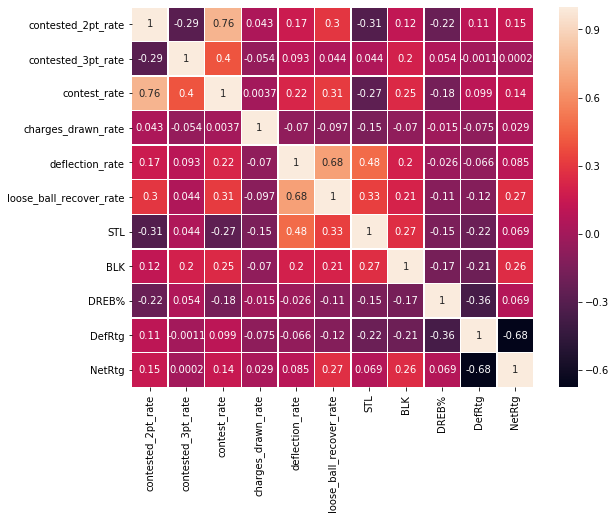

In [76]:
defense_only = hustle_adv_trad[['TEAM', 'contested_2pt_rate', 'contested_3pt_rate', 'contest_rate', 'charges_drawn_rate',
                              'deflection_rate', 'loose_ball_recover_rate', 'STL', 'BLK', 'DREB%','DefRtg','NetRtg']]

fig, ax = plt.subplots(figsize=(9,7))
chart = sn.heatmap(defense_only.corr(), annot=True, linewidths=0.5, ax=ax)

In [85]:
for col in defense_only.columns:
    if defense_only[col].dtypes == np.float64:
        defense_only[col] = defense_only[col].round(3)
        
defense_only.head()

,TEAM,contested_2pt_rate,contested_3pt_rate,contest_rate,charges_drawn_rate,deflection_rate,loose_ball_recover_rate,STL,BLK,DREB%,DefRtg,NetRtg
0,2019 Boston Celtics,0.311,0.256,0.568,0.009,0.113,0.072,5.9,3.8,78.3,103.0,-1.5
1,2019 Brooklyn Nets,0.438,0.173,0.610,0.002,0.116,0.078,7.6,2.8,64.3,115.9,-10.2
2,2019 Denver Nuggets,0.453,0.192,0.645,0.005,0.132,0.075,5.7,4.6,70.3,111.1,2.2
3,2019 Detroit Pistons,0.310,0.235,0.544,0.015,0.132,0.062,7.3,4.0,72.7,120.5,-23.8
4,2019 Golden State Warriors,0.363,0.283,0.646,0.009,0.138,0.077,7.4,5.7,71.4,111.5,3.1


In [115]:
for col in hustle_adv_trad.columns:
    if hustle_adv_trad[col].dtypes == np.float64:
        hustle_adv_trad[col] = hustle_adv_trad[col].round(3)
        
hustle_adv_trad.head()

,TEAM,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE,WIN%,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,deflection_rate,loose_ball_recover_rate,charges_drawn_rate,contest_rate,contested_2pt_rate,contested_3pt_rate
0,2019 Boston Celtics,7.2,16.6,11.4,2.3,4.9,7.2,32.3,67.7,0.89,31.3,25.8,57.1,9,5,4,432.0,101.4,103.0,-1.5,60.1,1.45,16.1,22.9,78.3,51.4,14.7,49.1,53.9,100.61,50.2,0.556,102.1,35.7,84.1,42.4,11.3,33.0,34.3,19.4,24.2,80.3,7.4,40.3,47.8,21.4,14.8,5.9,3.8,4.3,20.8,21.0,-1.4,0.113,0.072,0.009,0.568,0.311,0.256
1,2019 Brooklyn Nets,13.4,31.2,12.2,3.8,4.4,8.2,46.3,53.7,0.20,46.2,18.2,64.4,5,1,4,240.0,105.7,115.9,-10.2,50.0,1.35,13.8,25.8,64.3,44.1,13.5,48.0,53.4,105.50,41.3,0.200,111.4,38.4,91.4,42.0,11.0,34.0,32.4,23.6,29.2,80.8,11.2,29.2,40.4,19.2,14.2,7.6,2.8,6.0,22.8,24.2,-11.0,0.116,0.078,0.002,0.610,0.438,0.173
2,2019 Denver Nuggets,9.6,21.6,12.4,3.5,3.5,7.0,50.0,50.0,0.43,42.4,18.0,60.4,14,7,7,692.0,113.3,111.1,2.2,60.1,2.45,17.6,31.1,70.3,50.5,10.2,49.6,53.9,93.68,51.8,0.500,109.1,39.9,90.2,44.3,9.6,27.8,34.4,19.7,25.2,78.2,13.1,34.6,47.7,24.0,9.8,5.7,4.6,4.7,21.3,21.9,1.9,0.132,0.075,0.005,0.645,0.453,0.192
3,2019 Detroit Pistons,11.0,25.0,13.3,2.5,3.8,6.3,40.0,60.0,1.50,31.3,23.8,55.0,4,0,4,192.0,96.8,120.5,-23.8,61.3,2.19,16.5,24.8,72.7,45.2,10.4,44.4,47.1,101.13,35.4,0.000,98.0,37.5,96.8,38.8,11.0,33.3,33.1,12.0,16.5,72.7,10.8,31.5,42.3,23.0,10.5,7.3,4.0,8.8,24.3,20.0,-23.8,0.132,0.062,0.015,0.544,0.310,0.235
4,2019 Golden State Warriors,8.1,20.6,13.6,3.4,4.2,7.6,44.3,55.7,0.91,35.8,27.9,63.7,22,14,8,1066.0,114.6,111.5,3.1,69.1,1.91,20.0,30.1,71.4,51.3,15.0,54.8,58.9,98.57,53.6,0.636,114.1,41.1,86.1,47.7,12.2,32.7,37.2,19.8,24.3,81.3,10.1,33.2,43.3,28.4,14.9,7.4,5.7,3.9,23.2,22.3,3.4,0.138,0.077,0.009,0.646,0.363,0.283


In [113]:
fig = px.scatter(hustle_adv_trad, x='deflection_rate', y='DefRtg',
                 title='2016-19 NBA Teams Playoffs DefRtg vs. Deflection Rate',
            color='contest_rate', size='contested_2pt_rate', trendline='ols', hover_data=['TEAM']) 

fig.show()

In [114]:
fig = px.scatter(hustle_adv_trad, x='STL', y='DefRtg', title='2016-19 NBA Teams Playoffs DefRtg',
            color='BLK', size='deflection_rate', trendline='ols', hover_data=['TEAM'], 
                 size_max=30, opacity=0.4) 

fig.show()

In [116]:
opp19 = get_nba_url('https://stats.nba.com/teams/opponent/?sort=W&dir=-1&Season=2018-19&SeasonType=Playoffs')
opp19.head()

,Unnamed: 0,TEAM,GP,W,L,MIN,Opp FGM,Opp FGA,Opp FG%,Opp 3PM,Opp 3PA,Opp 3P%,Opp FTM,Opp FTA,Opp FT%,Opp OREB,Opp DREB,Opp REB,Opp AST,Opp TOV,Opp STL,Opp BLK,Opp BLKA,Opp PF,Opp PFD,Opp PTS,+/-,GP RANK,W RANK,L RANK,MIN RANK,Opp FGM RANK,Opp FGA RANK,Opp FG% RANK,Opp 3PM RANK,Opp 3PA RANK,Opp 3P% RANK,Opp FTM RANK,Opp FTA RANK,Opp FT% RANK,Opp OREB RANK,Opp DREB RANK,Opp REB RANK,Opp AST RANK,Opp TOV RANK,Opp STL RANK,Opp BLK RANK,Opp BLKA RANK,Opp PF RANK,Opp PFD RANK,Opp PTS RANK,+/- RANK
0,1,Toronto Raptors,24,16,8,48.4,35.3,83.2,42.4,11.1,33.8,32.9,19.4,25.0,77.5,9.8,35.5,45.3,23.6,15.4,6.5,5.0,4.6,21.8,22.6,101.1,-5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Golden State Warriors,22,14,8,48.5,38.4,86.1,44.6,13.1,36.3,36.1,21.0,25.9,81.0,10.1,30.8,41.0,22.5,14.7,7.8,3.9,5.7,22.3,23.2,110.8,-3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Milwaukee Bucks,15,10,5,48.7,36.5,90.0,40.6,12.3,36.1,34.1,18.6,23.2,80.2,8.5,36.5,45.1,22.6,12.1,7.0,4.7,6.4,23.3,21.8,104.0,-8.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Portland Trail Blazers,16,8,8,49.6,39.9,89.6,44.6,10.3,30.3,33.9,20.9,26.3,79.6,12.9,35.4,48.3,24.0,13.0,7.3,5.9,5.1,22.8,22.8,111.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Denver Nuggets,14,7,7,49.4,39.9,89.0,44.9,8.6,25.9,33.1,18.9,24.9,75.9,11.6,34.7,46.4,20.0,9.6,5.4,4.7,4.6,21.9,21.3,107.3,-1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
opp18 = get_nba_url('https://stats.nba.com/teams/opponent/?sort=W&dir=-1&Season=2017-18&SeasonType=Playoffs')
opp18.head()

,Unnamed: 0,TEAM,GP,W,L,MIN,Opp FGM,Opp FGA,Opp FG%,Opp 3PM,Opp 3PA,Opp 3P%,Opp FTM,Opp FTA,Opp FT%,Opp OREB,Opp DREB,Opp REB,Opp AST,Opp TOV,Opp STL,Opp BLK,Opp BLKA,Opp PF,Opp PFD,Opp PTS,+/-,GP RANK,W RANK,L RANK,MIN RANK,Opp FGM RANK,Opp FGA RANK,Opp FG% RANK,Opp 3PM RANK,Opp 3PA RANK,Opp 3P% RANK,Opp FTM RANK,Opp FTA RANK,Opp FT% RANK,Opp OREB RANK,Opp DREB RANK,Opp REB RANK,Opp AST RANK,Opp TOV RANK,Opp STL RANK,Opp BLK RANK,Opp BLKA RANK,Opp PF RANK,Opp PFD RANK,Opp PTS RANK,+/- RANK
0,1,Golden State Warriors,21,16,5,48.2,37.0,87.4,42.3,10.2,32.5,31.3,16.2,21.0,77.1,10.3,32.7,43.0,20.4,13.6,7.5,3.6,5.8,19.4,19.7,100.4,-10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Cleveland Cavaliers,22,12,10,48.5,38.3,82.0,46.7,10.2,29.5,34.7,16.0,20.6,77.5,8.2,31.9,40.0,22.4,11.8,6.5,4.4,4.4,21.9,19.5,102.9,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Boston Celtics,19,11,8,48.5,37.5,81.4,46.1,9.2,27.5,33.5,16.4,22.4,73.4,8.5,34.5,42.9,21.1,13.5,5.9,5.6,4.1,21.4,20.4,100.7,-0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Houston Rockets,17,11,6,48.0,38.5,82.6,46.5,10.6,27.9,38.2,15.5,20.7,75.0,8.5,35.1,43.6,21.4,14.0,6.8,4.4,5.5,19.5,19.1,103.1,-1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,New Orleans Pelicans,9,5,4,48.0,42.3,92.4,45.8,10.4,31.9,32.8,15.7,19.8,79.2,10.1,36.7,46.8,25.6,13.8,9.2,4.9,5.0,19.0,19.3,110.8,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
opp17 = get_nba_url('https://stats.nba.com/teams/opponent/?sort=W&dir=-1&Season=2016-17&SeasonType=Playoffs')
opp17.head()

,Unnamed: 0,TEAM,GP,W,L,MIN,Opp FGM,Opp FGA,Opp FG%,Opp 3PM,Opp 3PA,Opp 3P%,Opp FTM,Opp FTA,Opp FT%,Opp OREB,Opp DREB,Opp REB,Opp AST,Opp TOV,Opp STL,Opp BLK,Opp BLKA,Opp PF,Opp PFD,Opp PTS,+/-,GP RANK,W RANK,L RANK,MIN RANK,Opp FGM RANK,Opp FGA RANK,Opp FG% RANK,Opp 3PM RANK,Opp 3PA RANK,Opp 3P% RANK,Opp FTM RANK,Opp FTA RANK,Opp FT% RANK,Opp OREB RANK,Opp DREB RANK,Opp REB RANK,Opp AST RANK,Opp TOV RANK,Opp STL RANK,Opp BLK RANK,Opp BLKA RANK,Opp PF RANK,Opp PFD RANK,Opp PTS RANK,+/- RANK
0,1,Golden State Warriors,17,16,1,48.0,38.3,89.2,42.9,10.2,30.0,34.1,18.9,24.7,76.7,11.1,32.1,43.2,20.1,14.0,8.4,3.8,6.1,21.6,21.8,105.8,-13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Cleveland Cavaliers,18,13,5,48.0,40.2,88.0,45.7,11.2,30.9,36.3,16.6,20.7,80.2,10.3,29.9,40.2,25.3,13.2,7.4,3.8,4.7,22.3,18.8,108.3,-7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Boston Celtics,18,9,9,48.3,39.7,83.8,47.3,9.8,27.7,35.3,19.0,23.8,79.7,11.3,33.2,44.5,22.6,14.2,7.4,5.2,4.1,19.0,20.8,108.1,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,San Antonio Spurs,16,8,8,48.6,38.1,82.4,46.2,12.7,33.3,38.2,17.1,21.1,81.3,8.7,31.1,39.8,22.4,13.8,7.9,3.9,4.7,21.3,18.8,106.1,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Washington Wizards,13,7,6,48.4,38.3,83.5,45.9,11.1,30.3,36.5,20.4,26.5,77.0,9.9,30.8,40.8,25.0,14.6,7.0,4.4,6.6,22.5,23.0,108.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
opp19['TEAM'] = opp19['TEAM'].apply(lambda x: '2019 ' + x)
opp18['TEAM'] = opp18['TEAM'].apply(lambda x: '2018 ' + x)
opp17['TEAM'] = opp17['TEAM'].apply(lambda x: '2017 ' + x)
opp17.head(3)

,Unnamed: 0,TEAM,GP,W,L,MIN,Opp FGM,Opp FGA,Opp FG%,Opp 3PM,Opp 3PA,Opp 3P%,Opp FTM,Opp FTA,Opp FT%,Opp OREB,Opp DREB,Opp REB,Opp AST,Opp TOV,Opp STL,Opp BLK,Opp BLKA,Opp PF,Opp PFD,Opp PTS,+/-,GP RANK,W RANK,L RANK,MIN RANK,Opp FGM RANK,Opp FGA RANK,Opp FG% RANK,Opp 3PM RANK,Opp 3PA RANK,Opp 3P% RANK,Opp FTM RANK,Opp FTA RANK,Opp FT% RANK,Opp OREB RANK,Opp DREB RANK,Opp REB RANK,Opp AST RANK,Opp TOV RANK,Opp STL RANK,Opp BLK RANK,Opp BLKA RANK,Opp PF RANK,Opp PFD RANK,Opp PTS RANK,+/- RANK
0,1,2017 Golden State Warriors,17,16,1,48.0,38.3,89.2,42.9,10.2,30.0,34.1,18.9,24.7,76.7,11.1,32.1,43.2,20.1,14.0,8.4,3.8,6.1,21.6,21.8,105.8,-13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2017 Cleveland Cavaliers,18,13,5,48.0,40.2,88.0,45.7,11.2,30.9,36.3,16.6,20.7,80.2,10.3,29.9,40.2,25.3,13.2,7.4,3.8,4.7,22.3,18.8,108.3,-7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2017 Boston Celtics,18,9,9,48.3,39.7,83.8,47.3,9.8,27.7,35.3,19.0,23.8,79.7,11.3,33.2,44.5,22.6,14.2,7.4,5.2,4.1,19.0,20.8,108.1,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
opp_trad = pd.concat([opp19, opp18, opp17])

opp_added = pd.merge(hustle_adv_trad, opp_trad, on='TEAM')
opp_added

,TEAM,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots,GP_x,W_x,L_x,MIN_x,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE,WIN%,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-_x,deflection_rate,loose_ball_recover_rate,charges_drawn_rate,contest_rate,contested_2pt_rate,contested_3pt_rate,Unnamed: 0,GP_y,W_y,L_y,MIN_y,Opp FGM,Opp FGA,Opp FG%,Opp 3PM,Opp 3PA,Opp 3P%,Opp FTM,Opp FTA,Opp FT%,Opp OREB,Opp DREB,Opp REB,Opp AST,Opp TOV,Opp STL,Opp BLK,Opp BLKA,Opp PF,Opp PFD,Opp PTS,+/-_y,GP RANK,W RANK,L RANK,MIN RANK,Opp FGM RANK,Opp FGA RANK,Opp FG% RANK,Opp 3PM RANK,Opp 3PA RANK,Opp 3P% RANK,Opp FTM RANK,Opp FTA RANK,Opp FT% RANK,Opp OREB RANK,Opp DREB RANK,Opp REB RANK,Opp AST RANK,Opp TOV RANK,Opp STL RANK,Opp BLK RANK,Opp BLKA RANK,Opp PF RANK,Opp PFD RANK,Opp PTS RANK,+/- RANK
0,2019 Boston Celtics,7.2,16.6,11.4,2.3,4.9,7.2,32.3,67.7,0.89,31.3,25.8,57.1,9,5,4,432.0,101.4,103.0,-1.5,60.1,1.45,16.1,22.9,78.3,51.4,14.7,49.1,53.9,100.61,50.2,0.556,102.1,35.7,84.1,42.4,11.3,33.0,34.3,19.4,24.2,80.3,7.4,40.3,47.8,21.4,14.8,5.9,3.8,4.3,20.8,21.0,-1.4,0.113,0.072,0.009,0.568,0.311,0.256,8,9,5,4,48.0,36.9,87.6,42.1,12.3,36.2,34.0,17.4,24.4,71.4,8.8,37.4,46.2,22.1,12.2,7.2,4.3,3.8,21.0,20.8,103.6,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019 Brooklyn Nets,13.4,31.2,12.2,3.8,4.4,8.2,46.3,53.7,0.20,46.2,18.2,64.4,5,1,4,240.0,105.7,115.9,-10.2,50.0,1.35,13.8,25.8,64.3,44.1,13.5,48.0,53.4,105.50,41.3,0.200,111.4,38.4,91.4,42.0,11.0,34.0,32.4,23.6,29.2,80.8,11.2,29.2,40.4,19.2,14.2,7.6,2.8,6.0,22.8,24.2,-11.0,0.116,0.078,0.002,0.610,0.438,0.173,11,5,1,4,48.0,46.0,93.2,49.4,9.0,26.8,33.6,21.4,27.8,77.0,13.8,39.2,53.0,27.0,16.4,7.8,6.0,2.8,24.2,22.8,122.4,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019 Denver Nuggets,9.6,21.6,12.4,3.5,3.5,7.0,50.0,50.0,0.43,42.4,18.0,60.4,14,7,7,692.0,113.3,111.1,2.2,60.1,2.45,17.6,31.1,70.3,50.5,10.2,49.6,53.9,93.68,51.8,0.500,109.1,39.9,90.2,44.3,9.6,27.8,34.4,19.7,25.2,78.2,13.1,34.6,47.7,24.0,9.8,5.7,4.6,4.7,21.3,21.9,1.9,0.132,0.075,0.005,0.645,0.453,0.192,5,14,7,7,49.4,39.9,89.0,44.9,8.6,25.9,33.1,18.9,24.9,75.9,11.6,34.7,46.4,20.0,9.6,5.4,4.7,4.6,21.9,21.3,107.3,-1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019 Detroit Pistons,11.0,25.0,13.3,2.5,3.8,6.3,40.0,60.0,1.50,31.3,23.8,55.0,4,0,4,192.0,96.8,120.5,-23.8,61.3,2.19,16.5,24.8,72.7,45.2,10.4,44.4,47.1,101.13,35.4,0.000,98.0,37.5,96.8,38.8,11.0,33.3,33.1,12.0,16.5,72.7,10.8,31.5,42.3,23.0,10.5,7.3,4.0,8.8,24.3,20.0,-23.8,0.132,0.062,0.015,0.544,0.310,0.235,15,4,0,4,48.0,44.0,86.3,51.0,12.5,33.8,37.0,21.3,28.0,75.9,9.8,43.5,53.3,28.5,14.5,5.8,8.8,4.0,20.0,24.3,121.8,23.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019 Golden State Warriors,8.1,20.6,13.6,3.4,4.2,7.6,44.3,55.7,0.91,35.8,27.9,63.7,22,14,8,1066.0,114.6,111.5,3.1,69.1,1.91,20.0,30.1,71.4,51.3,15.0,54.8,58.9,98.57,53.6,0.636,114.1,41.1,86.1,47.7,12.2,32.7,37.2,19.8,24.3,81.3,10.1,33.2,43.3,28.4,14.9,7.4,5.7,3.9,23.2,22.3,3.4,0.138,0.077,0.009,0.646,0.363,0.283,2,22,14,8,48.5,38.4,86.1,44.6,13.1,36.3,36.1,21.0,25.9,81.0,10.1,30.8,41.0,22.5,14.7,7.8,3.9,5.7,22.3,23.2,110.8,-3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019 Houston Rockets,5.5,12.8,11.9,3.8,3.9,7.7,49.4,50.6,0.73,30.7,22.3,53.0,11,6,5,533.0,110.5,107.4,3.0,49.1,1.16,14.1,28.7,68.7,49.1,16.1,53.7,57.4,97.26,49.7,0.545,108.5,37.2,83.8,44.4,15.6,42.7,36.6,18.5,24.3,76.4,9.6,33.3,42.9,18.3,15.8,8.5,5.1,4.6,21.6,21.5,3.2,0.122,0.079,0.008,0.545,0.316,0.229,7,11,6

In [121]:
opp_added.columns.to_list()

['TEAM',
 'Screen  Assists',
 'Screen  Assists PTS',
 'Deflections',
 'OFF Loose Balls  Recovered',
 'DEF Loose Balls  Recovered',
 'Loose Balls  Recovered',
 '% Loose Balls  Recovered OFF',
 '% Loose Balls  Recovered DEF',
 'Charges  Drawn',
 'Contested 2PT Shots',
 'Contested 3PT Shots',
 'Contested  Shots',
 'GP_x',
 'W_x',
 'L_x',
 'MIN_x',
 'OffRtg',
 'DefRtg',
 'NetRtg',
 'AST%',
 'AST/TO',
 'AST  Ratio',
 'OREB%',
 'DREB%',
 'REB%',
 'TOV%',
 'eFG%',
 'TS%',
 'PACE',
 'PIE',
 'WIN%',
 'PTS',
 'FGM',
 'FGA',
 'FG%',
 '3PM',
 '3PA',
 '3P%',
 'FTM',
 'FTA',
 'FT%',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 '+/-_x',
 'deflection_rate',
 'loose_ball_recover_rate',
 'charges_drawn_rate',
 'contest_rate',
 'contested_2pt_rate',
 'contested_3pt_rate',
 'Unnamed: 0',
 'GP_y',
 'W_y',
 'L_y',
 'MIN_y',
 'Opp  FGM',
 'Opp  FGA',
 'Opp  FG%',
 'Opp  3PM',
 'Opp  3PA',
 'Opp  3P%',
 'Opp  FTM',
 'Opp  FTA',
 'Opp  FT%',
 'Opp  OREB',
 'Opp  DREB',
 'O

In [122]:
opp_added.drop(columns=['+/-_y','GP RANK','W RANK','L RANK','MIN RANK','Opp  FGM RANK','Opp  FGA RANK','Opp  FG% RANK',
                        'Opp  3PM RANK','Opp  3PA RANK','Opp  3P% RANK','Opp  FTM RANK','Opp  FTA RANK','Opp  FT% RANK',
                        'Opp  OREB RANK','Opp  DREB RANK','Opp  REB RANK','Opp  AST RANK','Opp  TOV RANK','Opp  STL RANK',
                        'Opp  BLK RANK','Opp  BLKA RANK','Opp  PF RANK','Opp  PFD RANK','Opp  PTS RANK','+/- RANK',
                       'Unnamed: 0','GP_y','W_y','L_y','MIN_y'], inplace=True)
opp_added.rename(columns={ 'GP_x': 'GP', 'W_x': 'W', 'L_x': 'L','MIN_x': 'MIN'}, inplace=True)

opp_added.columns.to_list()

['TEAM',
 'Screen  Assists',
 'Screen  Assists PTS',
 'Deflections',
 'OFF Loose Balls  Recovered',
 'DEF Loose Balls  Recovered',
 'Loose Balls  Recovered',
 '% Loose Balls  Recovered OFF',
 '% Loose Balls  Recovered DEF',
 'Charges  Drawn',
 'Contested 2PT Shots',
 'Contested 3PT Shots',
 'Contested  Shots',
 'GP',
 'W',
 'L',
 'MIN',
 'OffRtg',
 'DefRtg',
 'NetRtg',
 'AST%',
 'AST/TO',
 'AST  Ratio',
 'OREB%',
 'DREB%',
 'REB%',
 'TOV%',
 'eFG%',
 'TS%',
 'PACE',
 'PIE',
 'WIN%',
 'PTS',
 'FGM',
 'FGA',
 'FG%',
 '3PM',
 '3PA',
 '3P%',
 'FTM',
 'FTA',
 'FT%',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 '+/-_x',
 'deflection_rate',
 'loose_ball_recover_rate',
 'charges_drawn_rate',
 'contest_rate',
 'contested_2pt_rate',
 'contested_3pt_rate',
 'Opp  FGM',
 'Opp  FGA',
 'Opp  FG%',
 'Opp  3PM',
 'Opp  3PA',
 'Opp  3P%',
 'Opp  FTM',
 'Opp  FTA',
 'Opp  FT%',
 'Opp  OREB',
 'Opp  DREB',
 'Opp  REB',
 'Opp  AST',
 'Opp  TOV',
 'Opp  STL',
 'Opp  BL

In [127]:
opp_added.rename(columns={'+/-_x': '+/-'}, inplace=True)

opp_added.columns.str.strip().str.split('  ', ' ')
opp_added.columns.to_list()

['TEAM',
 'Screen  Assists',
 'Screen  Assists PTS',
 'Deflections',
 'OFF Loose Balls  Recovered',
 'DEF Loose Balls  Recovered',
 'Loose Balls  Recovered',
 '% Loose Balls  Recovered OFF',
 '% Loose Balls  Recovered DEF',
 'Charges  Drawn',
 'Contested 2PT Shots',
 'Contested 3PT Shots',
 'Contested  Shots',
 'GP',
 'W',
 'L',
 'MIN',
 'OffRtg',
 'DefRtg',
 'NetRtg',
 'AST%',
 'AST/TO',
 'AST  Ratio',
 'OREB%',
 'DREB%',
 'REB%',
 'TOV%',
 'eFG%',
 'TS%',
 'PACE',
 'PIE',
 'WIN%',
 'PTS',
 'FGM',
 'FGA',
 'FG%',
 '3PM',
 '3PA',
 '3P%',
 'FTM',
 'FTA',
 'FT%',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PFD',
 '+/-',
 'deflection_rate',
 'loose_ball_recover_rate',
 'charges_drawn_rate',
 'contest_rate',
 'contested_2pt_rate',
 'contested_3pt_rate',
 'Opp  FGM',
 'Opp  FGA',
 'Opp  FG%',
 'Opp  3PM',
 'Opp  3PA',
 'Opp  3P%',
 'Opp  FTM',
 'Opp  FTA',
 'Opp  FT%',
 'Opp  OREB',
 'Opp  DREB',
 'Opp  REB',
 'Opp  AST',
 'Opp  TOV',
 'Opp  STL',
 'Opp  BLK'

In [149]:
no17 = opp_added[~opp_added['TEAM'].str.contains('2017')]
no17

,TEAM,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE,WIN%,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,deflection_rate,loose_ball_recover_rate,charges_drawn_rate,contest_rate,contested_2pt_rate,contested_3pt_rate,Opp FGM,Opp FGA,Opp FG%,Opp 3PM,Opp 3PA,Opp 3P%,Opp FTM,Opp FTA,Opp FT%,Opp OREB,Opp DREB,Opp REB,Opp AST,Opp TOV,Opp STL,Opp BLK,Opp BLKA,Opp PF,Opp PFD,Opp PTS
0,2019 Boston Celtics,7.2,16.6,11.4,2.3,4.9,7.2,32.3,67.7,0.89,31.3,25.8,57.1,9,5,4,432.0,101.4,103.0,-1.5,60.1,1.45,16.1,22.9,78.3,51.4,14.7,49.1,53.9,100.61,50.2,0.556,102.1,35.7,84.1,42.4,11.3,33.0,34.3,19.4,24.2,80.3,7.4,40.3,47.8,21.4,14.8,5.9,3.8,4.3,20.8,21.0,-1.4,0.113,0.072,0.009,0.568,0.311,0.256,36.9,87.6,42.1,12.3,36.2,34.0,17.4,24.4,71.4,8.8,37.4,46.2,22.1,12.2,7.2,4.3,3.8,21.0,20.8,103.6
1,2019 Brooklyn Nets,13.4,31.2,12.2,3.8,4.4,8.2,46.3,53.7,0.20,46.2,18.2,64.4,5,1,4,240.0,105.7,115.9,-10.2,50.0,1.35,13.8,25.8,64.3,44.1,13.5,48.0,53.4,105.50,41.3,0.200,111.4,38.4,91.4,42.0,11.0,34.0,32.4,23.6,29.2,80.8,11.2,29.2,40.4,19.2,14.2,7.6,2.8,6.0,22.8,24.2,-11.0,0.116,0.078,0.002,0.610,0.438,0.173,46.0,93.2,49.4,9.0,26.8,33.6,21.4,27.8,77.0,13.8,39.2,53.0,27.0,16.4,7.8,6.0,2.8,24.2,22.8,122.4
2,2019 Denver Nuggets,9.6,21.6,12.4,3.5,3.5,7.0,50.0,50.0,0.43,42.4,18.0,60.4,14,7,7,692.0,113.3,111.1,2.2,60.1,2.45,17.6,31.1,70.3,50.5,10.2,49.6,53.9,93.68,51.8,0.500,109.1,39.9,90.2,44.3,9.6,27.8,34.4,19.7,25.2,78.2,13.1,34.6,47.7,24.0,9.8,5.7,4.6,4.7,21.3,21.9,1.9,0.132,0.075,0.005,0.645,0.453,0.192,39.9,89.0,44.9,8.6,25.9,33.1,18.9,24.9,75.9,11.6,34.7,46.4,20.0,9.6,5.4,4.7,4.6,21.9,21.3,107.3
3,2019 Detroit Pistons,11.0,25.0,13.3,2.5,3.8,6.3,40.0,60.0,1.50,31.3,23.8,55.0,4,0,4,192.0,96.8,120.5,-23.8,61.3,2.19,16.5,24.8,72.7,45.2,10.4,44.4,47.1,101.13,35.4,0.000,98.0,37.5,96.8,38.8,11.0,33.3,33.1,12.0,16.5,72.7,10.8,31.5,42.3,23.0,10.5,7.3,4.0,8.8,24.3,20.0,-23.8,0.132,0.062,0.015,0.544,0.310,0.235,44.0,86.3,51.0,12.5,33.8,37.0,21.3,28.0,75.9,9.8,43.5,53.3,28.5,14.5,5.8,8.8,4.0,20.0,24.3,121.8
4,2019 Golden State Warriors,8.1,20.6,13.6,3.4,4.2,7.6,44.3,55.7,0.91,35.8,27.9,63.7,22,14,8,1066.0,114.6,111.5,3.1,69.1,1.91,20.0,30.1,71.4,51.3,15.0,54.8,58.9,98.57,53.6,0.636,114.1,41.1,86.1,47.7,12.2,32.7,37.2,19.8,24.3,81.3,10.1,33.2,43.3,28.4,14.9,7.4,5.7,3.9,23.2,22.3,3.4,0.138,0.077,0.009,0.646,0.363,0.283,38.4,86.1,44.6,13.1,36.3,36.1,21.0,25.9,81.0,10.1,30.8,41.0,22.5,14.7,7.8,3.9,5.7,22.3,23.2,110.8
5,2019 Houston Rockets,5.5,12.8,11.9,3.8,3.9,7.7,49.4,50.6,0.73,30.7,22.3,53.0,11,6,5,533.0,110.5,107.4,3.0,49.1,1.16,14.1,28.7,68.7,49.1,16.1,53.7,57.4,97.26,49.7,0.545,108.5,37.2,83.8,44.4,15.6,42.7,36.6,18.5,24.3,76.4,9.6,33.3,42.9,18.3,15.8,8.5,5.1,4.6,21.6,21.5,3.2,0.122,0.079,0.008,0.545,0.316,0.229,38.0,86.6,43.9,10.5,34.4,30.7,18.8,24.7,76.1,11.1,32.0,43.1,24.3,14.5,8.2,4.6,5.1,21.5,21.6,105.4
6,2019 Indiana Pacers,6.5,15.5,10.8,4.0,3.0,7.0,57.1,42.9,0.25,27.0,19.0,46.0,4,0,4,192.0,95.8,103.9,-8.1,61.9,1.73,16.4,19.6,73.7,45.1,12.5,46.1,49.6,95.63,45.4,0.000,91.8,33.5,83.5,40.1,10.0,29.8,33.6,14.8,20.5,72.0,8.0,32.3,40.3,20.8,12.0,8.3,3.5,3.0,20.0,19.5,-7.5,0.113,0.073,0.003,0.481,0.282,0.199,35.5,80.0,44.4,11.8,29.5,39.8,16.5,21.8,75.9,7.5,40.3,47.8,20.3,16.0,5.5,3.0,3.5,19.5,20.0,99.3
7,2019 LA Clippers,6.8,15.3,12.2,3.8,3.5,7.3,52.3,47.7,0.83,36.7,22.2,58.8,6,2,4,288.0,111.5,120.5,-9.0,63.6,1.69,17.7,29.3,71.4,49.0,14.6,51.1,56.3,103.08,43.1,0.333,114.7,39.8,89.2,44.7,11.5,31.7,36.3,23.5,28.8,81.5,10.0,30.2,40.2,25.3,15.0,8.0,3.3,7.5,25.0,25.8,-9.8,0.118,0.071,0.008,0.570,0.356,0.215,44.7,89.0,50.2,12.8,32.2,39.9,22.3,25.8,86.5,10.3,35.7,46.0,31.2,14.3,7.0,7.5,3.3,25.8,25.0,124.5
8,2019 Milwaukee Bucks,4.5,10.3,11.2,4.0,5.2,

In [150]:
no17_corr = no17.corr()

no17_writer = pd.ExcelWriter("playoff_stats_corr1819.xlsx", engine="xlsxwriter")

no17_corr.to_excel(no17_writer, sheet_name='correlations')

no17_writer.save()

In [186]:
playoff_writer = pd.ExcelWriter("all_playoff_stats.xlsx", engine="xlsxwriter")


opp_added.to_excel(playoff_writer, sheet_name='stats1719')
no17.to_excel(playoff_writer, sheet_name='stats1819')

playoff_writer.save()

In [168]:
fig = px.scatter(opp_added, x='Loose Balls  Recovered', y='+/-', title='Loose Balls Recovered vs. Plus Minus',
                color='DefRtg', size='REB%', trendline='ols', hover_data=['TEAM'])

fig.show()

results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     2.685
Date:                Wed, 24 Jun 2020   Prob (F-statistic):              0.108
Time:                        17:10:54   Log-Likelihood:                -160.22
No. Observations:                  48   AIC:                             324.4
Df Residuals:                      46   BIC:                             328.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.9001      3.909     -2.277      0.027     -16.768      -1.032
x1             0.6044      0.369      1.639      0.108      -0.138       1.347
==============================================================================
Omnibus:                        3.111   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                2.057
Skew:                          -0.412   Prob(JB):                        0.357
Kurtosis:                       3.592   Cond. No.                         41.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
opp_added[['TEAM', 'Loose Balls  Recovered']].sort_values('Loose Balls  Recovered', ascending=False)

,TEAM,Loose Balls Recovered
43,2017 Portland Trail Blazers,15.3
25,2018 Oklahoma City Thunder,15.2
37,2017 Houston Rockets,14.8
36,2017 Golden State Warriors,14.1
19,2018 Houston Rockets,13.8
44,2017 San Antonio Spurs,13.8
18,2018 Golden State Warriors,13.7
26,2018 Philadelphia 76ers,13.5
31,2018 Washington Wizards,13.3
21,2018 Miami Heat,13.0


In [172]:
fig = px.scatter(opp_added, x='contest_rate', y='DefRtg', title='Contest Rate vs. Defensive Rating',
                color='BLK', size='contested_2pt_rate',
                 trendline='ols', hover_data=['TEAM'])
fig.add_annotation(
            x=0.65,
            y=122,
            xref='x',
            yref='y',
            text='Bubble sizes correspond with 2PT contest rate',
            showarrow=False,
            font=dict(
            size=16,
            color='blue'
            )
)
fig.show()

results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.4470
Date:                Wed, 24 Jun 2020   Prob (F-statistic):              0.507
Time:                        17:19:01   Log-Likelihood:                -142.81
No. Observations:                  48   AIC:                             289.6
Df Residuals:                      46   BIC:                             293.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.9977      7.701     13.634      0.000      89.496     120.499
x1             8.0670     12.067      0.669      0.507     -16.222      32.356
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.295
Skew:                           0.384   Prob(JB):                        0.523
Kurtosis:                       2.759   Cond. No.                         24.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
fig = px.scatter(opp_added, x='contested_2pt_rate', y='DefRtg', title='2PT Contest Rate vs. Defensive Rating',
                color='BLK', size='contest_rate',
                 trendline='ols', hover_data=['TEAM'])

fig.show()

results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5453
Date:                Wed, 24 Jun 2020   Prob (F-statistic):              0.464
Time:                        14:20:33   Log-Likelihood:                -142.76
No. Observations:                  48   AIC:                             289.5
Df Residuals:                      46   BIC:                             293.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.4442      5.033     21.148      0.000      96.313     116.575
x1             9.3146     12.614      0.738      0.464     -16.076      34.705
==============================================================================
Omnibus:                        1.796   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                1.626
Skew:                           0.436   Prob(JB):                        0.444
Kurtosis:                       2.772   Cond. No.                         20.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
fig = px.scatter(opp_added, x='contested_3pt_rate', y='DefRtg', title='3PT Contest Rate vs. Defensive Rating',
                color='BLK', size='contest_rate',
                 trendline='ols', hover_data=['TEAM'])

fig.show()

results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                 2.991e-05
Date:                Wed, 24 Jun 2020   Prob (F-statistic):              0.996
Time:                        14:23:38   Log-Likelihood:                -143.04
No. Observations:                  48   AIC:                             290.1
Df Residuals:                      46   BIC:                             293.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.1486      4.368     25.215      0.000     101.355     118.942
x1            -0.0980     17.926     -0.005      0.996     -36.181      35.985
==============================================================================
Omnibus:                        1.321   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.517   Jarque-Bera (JB):                1.333
Skew:                           0.342   Prob(JB):                        0.514
Kurtosis:                       2.555   Cond. No.                         27.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
fig = px.scatter(opp_added, x='Opp  3PA', y='DefRtg', title='Opponent 3PT Attempts vs. Defensive Rating',
                color='contest_rate', size='contested_3pt_rate',
                 trendline='ols', hover_data=['TEAM'])

fig.show()

results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.3074
Date:                Wed, 24 Jun 2020   Prob (F-statistic):              0.582
Time:                        16:57:27   Log-Likelihood:                -142.88
No. Observations:                  48   AIC:                             289.8
Df Residuals:                      46   BIC:                             293.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        112.8800      5.018     22.493      0.000     102.778     122.982
x1            -0.0899      0.162     -0.554      0.582      -0.416       0.237
==============================================================================
Omnibus:                        1.601   Durbin-Watson:                   2.165
Prob(Omnibus):                  0.449   Jarque-Bera (JB):                1.572
Skew:                           0.393   Prob(JB):                        0.456
Kurtosis:                       2.590   Cond. No.                         222.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
fig = px.scatter(opp_added, x='deflection_rate', y='DefRtg', title='Deflection Rate vs. Defensive Rating',
                color='STL', size='DREB', trendline='ols', hover_data=['TEAM'])

fig.show()

results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.1953
Date:                Wed, 24 Jun 2020   Prob (F-statistic):              0.661
Time:                        00:08:13   Log-Likelihood:                -142.94
No. Observations:                  48   AIC:                             289.9
Df Residuals:                      46   BIC:                             293.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.8730      4.017     27.852      0.000     103.788     119.958
x1           -11.6423     26.342     -0.442      0.661     -64.665      41.381
==============================================================================
Omnibus:                        1.134   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.567   Jarque-Bera (JB):                1.174
Skew:                           0.309   Prob(JB):                        0.556
Kurtosis:                       2.548   Cond. No.                         38.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
fig = px.scatter(no17, x='DEF Loose Balls  Recovered', y='DefRtg', 
                 title='Defensive Loose Balls Recovered vs. Defensive Rating',
                color='DREB', size='STL', trendline='ols', hover_data=['TEAM'])

fig.show()

results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     3.480
Date:                Wed, 24 Jun 2020   Prob (F-statistic):             0.0719
Time:                        13:42:51   Log-Likelihood:                -94.486
No. Observations:                  32   AIC:                             193.0
Df Residuals:                      30   BIC:                             195.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.0953      2.601     43.858      0.000     108.782     119.408
x1            -0.8868      0.475     -1.866      0.072      -1.858       0.084
==============================================================================
Omnibus:                        0.645   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.724   Jarque-Bera (JB):                0.740
Skew:                           0.232   Prob(JB):                        0.691
Kurtosis:                       2.416   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
fig = px.scatter(opp_added, x='BLKA', y='DefRtg', 
                 title='Opponent Blocked Shots vs. Defensive Rating',
                color='Opp  STL', size='TOV', trendline='ols', hover_data=['TEAM'])

fig.show()

results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     10.51
Date:                Wed, 24 Jun 2020   Prob (F-statistic):            0.00221
Time:                        16:56:08   Log-Likelihood:                -138.10
No. Observations:                  48   AIC:                             280.2
Df Residuals:                      46   BIC:                             283.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.0841      2.263     45.561      0.000      98.530     107.638
x1             1.3874      0.428      3.242      0.002       0.526       2.249
==============================================================================
Omnibus:                        1.554   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.460   Jarque-Bera (JB):                1.221
Skew:                           0.172   Prob(JB):                        0.543
Kurtosis:                       2.299   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
fig = px.scatter(opp_added, x='BLKA', y='+/-', 
                 title='Opponent Blocked Shots vs. Plus Minus',
                color='Opp  STL', trendline='ols', hover_data=['TEAM'])

fig.show()

results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     17.30
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           0.000138
Time:                        23:31:45   Log-Likelihood:                -153.92
No. Observations:                  48   AIC:                             311.8
Df Residuals:                      46   BIC:                             315.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8506      3.146      3.131      0.003       3.518      16.183
x1            -2.4751      0.595     -4.159      0.000      -3.673      -1.277
==============================================================================
Omnibus:                        0.171   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.918   Jarque-Bera (JB):                0.310
Skew:                          -0.125   Prob(JB):                        0.857
Kurtosis:                       2.695   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
fig = px.scatter(opp_added, x='BLKA', y='OffRtg', 
                 title='Opponent Blocked Shots vs. Offensive Rating',
                color='Opp  STL', trendline='ols', hover_data=['TEAM'])

fig.show()

results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     3.520
Date:                Wed, 24 Jun 2020   Prob (F-statistic):             0.0670
Time:                        23:32:04   Log-Likelihood:                -145.42
No. Observations:                  48   AIC:                             294.8
Df Residuals:                      46   BIC:                             298.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        112.1609      2.635     42.561      0.000     106.856     117.465
x1            -0.9352      0.498     -1.876      0.067      -1.939       0.068
==============================================================================
Omnibus:                        2.379   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                1.461
Skew:                          -0.370   Prob(JB):                        0.482
Kurtosis:                       3.429   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
stats_corr = opp_added.corr()

stats_writer = pd.ExcelWriter("playoff_stats_correlations.xlsx", engine="xlsxwriter")

stats_corr.to_excel(stats_writer, sheet_name="correlations")

stats_writer.save()